In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
wa_ev_data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/State_Washington_Electric_Vehicle_Title_Registration_Activity.csv')

In [ ]:
wa_ev_data.dtypes

Clean Alternative Fuel Vehicle Type                                object
VIN (1-10)                                                         object
DOL Vehicle ID                                                      int64
Model Year                                                          int64
Make                                                               object
Model                                                              object
Vehicle Primary Use                                                object
Electric Range                                                      int64
Odometer Reading                                                    int64
Odometer Code                                                      object
New or Used Vehicle                                                object
Sale Price                                                          int64
Sale Date                                                          object
Base MSRP                             

In [ ]:
wa_ev_data.columns = wa_ev_data.columns.str.lower().str.replace(' ', '_').str.replace(':', '_').str.replace('/', '_')

In [ ]:
wa_ev_data.dtypes

clean_alternative_fuel_vehicle_type                                object
vin_(1-10)                                                         object
dol_vehicle_id                                                      int64
model_year                                                          int64
make                                                               object
model                                                              object
vehicle_primary_use                                                object
electric_range                                                      int64
odometer_reading                                                    int64
odometer_code                                                      object
new_or_used_vehicle                                                object
sale_price                                                          int64
sale_date                                                          object
base_msrp                             

In [ ]:
wa_ev_data['clean_alternative_fuel_vehicle_type'].value_counts()

Battery Electric Vehicle (BEV)            524189
Plug-in Hybrid Electric Vehicle (PHEV)    196074
Hydrogen Powered Vehicle                       3
Name: clean_alternative_fuel_vehicle_type, dtype: int64

In [ ]:
wa_ev_data['sale_date'].value_counts()

March 18 2022        386
September 29 2018    325
January 28 2023      316
December 31 2022     304
February 18 2023     304
                    ... 
December 25 2016       1
November 24 2016       1
December 25 2017       1
November 28 2019       1
December 12 2011       1
Name: sale_date, Length: 4400, dtype: int64

In [ ]:
wa_ev_data['sale_date'].isnull().value_counts()

True     504404
False    215862
Name: sale_date, dtype: int64

In [ ]:
wa_ev_data['model_year'].value_counts()

2018    95759
2022    71156
2017    69088
2013    68547
2021    67564
2019    60378
2015    56175
2016    54164
2020    52875
2014    44610
2023    36638
2012    27338
2011    14736
2010      554
2008      376
2000      129
1999       57
2002       43
1998       30
1997       21
2001       14
2003        7
1993        4
1994        3
Name: model_year, dtype: int64

In [ ]:
phev_wa_ev_data = wa_ev_data[wa_ev_data['clean_alternative_fuel_vehicle_type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
phev_wa_ev_data = phev_wa_ev_data[phev_wa_ev_data['model_year'] < 2023]

In [ ]:
sorted(phev_wa_ev_data['model_year'].unique())

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [ ]:
phev_wa_ev_data['model_year'].value_counts().sort_index()

2010       66
2011     1020
2012    13059
2013    22783
2014    21358
2015    13139
2016    16174
2017    32663
2018    28350
2019    10135
2020     7405
2021    12952
2022    10756
Name: model_year, dtype: int64

<Axes: ylabel='model_year'>

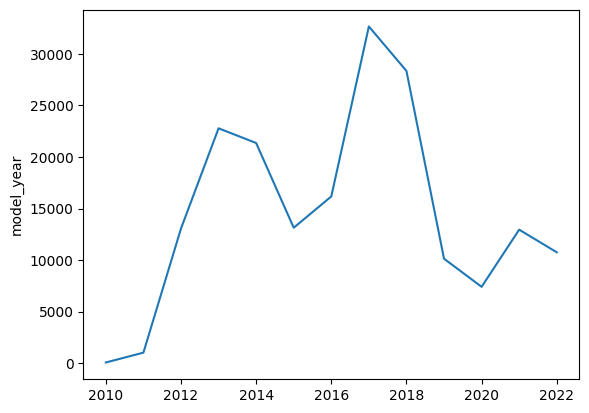

In [ ]:
sns.lineplot(x = sorted(phev_wa_ev_data['model_year'].unique()), y = phev_wa_ev_data['model_year'].value_counts().sort_index())

In [ ]:
bev_wa_ev_data = wa_ev_data[wa_ev_data['clean_alternative_fuel_vehicle_type'] == 'Battery Electric Vehicle (BEV)']
bev_wa_ev_data = bev_wa_ev_data[bev_wa_ev_data['model_year'] < 2023]

In [ ]:
sorted(bev_wa_ev_data['model_year'].unique())

[1993,
 1994,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2008,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [ ]:
bev_wa_ev_data['model_year'].value_counts().sort_index()

1993        4
1994        3
1997       21
1998       30
1999       57
2000      129
2001       14
2002       43
2003        7
2008      376
2010      488
2011    13716
2012    14279
2013    45764
2014    23252
2015    43034
2016    37989
2017    36425
2018    67409
2019    50243
2020    45470
2021    54612
2022    60400
Name: model_year, dtype: int64

<Axes: ylabel='model_year'>

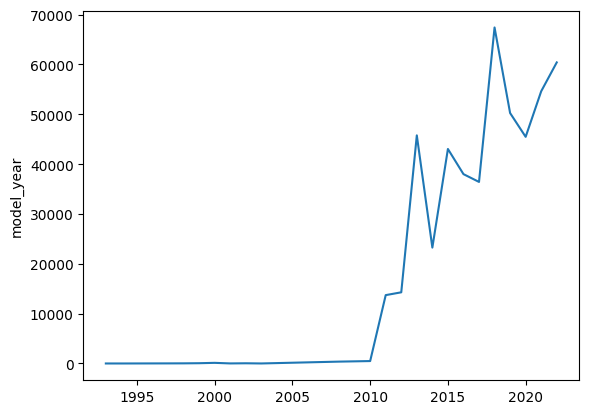

In [ ]:
sns.lineplot(x = sorted(bev_wa_ev_data['model_year'].unique()), y = bev_wa_ev_data['model_year'].value_counts().sort_index())

In [ ]:
x = sorted(bev_wa_ev_data['model_year'].unique())
x = np.array(x).reshape(-1, 1)
y = bev_wa_ev_data['model_year'].value_counts().sort_index()

model = LinearRegression()
model.fit(x, y)

pred_x = []
for i in range(2023, 2033):
    pred_x.append([i])

pred_y = model.predict(pred_x)

pred_x = np.array(pred_x).reshape(-1, 1)
bev_x = np.vstack((x, pred_x)).flatten()
bev_y = np.concatenate((y, pred_y))

In [ ]:
x = sorted(phev_wa_ev_data['model_year'].unique())
x = np.array(x).reshape(-1, 1)
y = phev_wa_ev_data['model_year'].value_counts().sort_index()

model = LinearRegression()
model.fit(x, y)

pred_x = []
for i in range(2023, 2033):
    pred_x.append([i])

pred_y = model.predict(pred_x)

pred_x = np.array(pred_x).reshape(-1, 1)
phev_x = np.vstack((x, pred_x)).flatten()
phev_y = np.concatenate((y, pred_y))

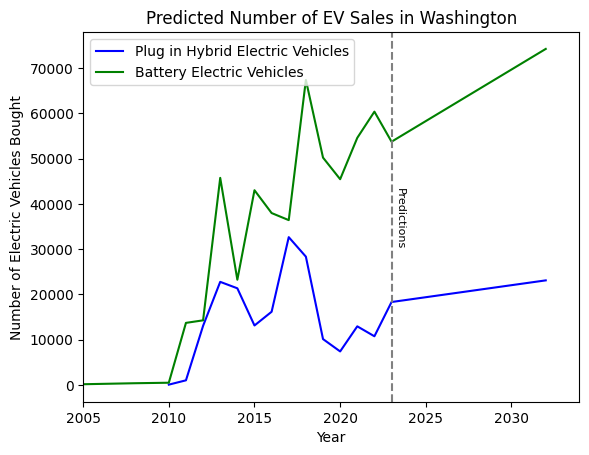

In [ ]:
sns.lineplot(x = phev_x, y = phev_y, label = 'Plug in Hybrid Electric Vehicles', color = 'blue')
sns.lineplot(x = bev_x, y = bev_y, label = 'Battery Electric Vehicles', color = 'green')
plt.gca().set_xlim(left = 2005)
plt.axvline(x=2023, color='gray', linestyle='--')
label = plt.text(x=2023.5, y=30000, s="Predictions", ha="center", va="bottom", fontsize=8)
label.set_rotation(270)
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles Bought')
plt.title('Predicted Number of EV Sales in Washington')
plt.legend(loc = 'upper left')
plt.show()